In [1]:
#Import Pacakges
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [2]:
#Retrieving the images and their labels 
#We iterate over all the classes and append images and their respective labels in the data and labels list. The PIL library is used to open image content into an array 
#To enhance the performance of the predictive model.

for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [3]:
#Converting lists into numpy arrays. We need to convert the list into numpy arrays for feeding to the model.
#The shape of data is (39209, 30, 30, 3) which means that there are 39,209 images of size 30×30 pixels and the last 3 means the data contains colored images (RGB value).
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [4]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [5]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [6]:
#Converting the labels into one hot encoding
#Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.
#categorical data must be converted to a numerical form.
#one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [7]:
#Building the model using tensorflow. we will build a CNN model (Convolutional Neural Network). CNN is best for image classification purposes.
#We compile the model with Adam optimizer which performs well and loss is “categorical_crossentropy” because we have multiple classes to categorize.
#Flatten layer to squeeze the layers into 1 dimension
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [8]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")
  

Epoch 1/15
981/981 [==============================] - 57s 44ms/step - loss: 3.4187 - accuracy: 0.2907 - val_loss: 0.6046 - val_accuracy: 0.8599
Epoch 2/15
981/981 [==============================] - 43s 44ms/step - loss: 0.8349 - accuracy: 0.7535 - val_loss: 0.2876 - val_accuracy: 0.9288
Epoch 3/15
981/981 [==============================] - 43s 44ms/step - loss: 0.5490 - accuracy: 0.8366 - val_loss: 0.1401 - val_accuracy: 0.9629
Epoch 4/15
981/981 [==============================] - 43s 44ms/step - loss: 0.4050 - accuracy: 0.8799 - val_loss: 0.1373 - val_accuracy: 0.9640
Epoch 5/15
981/981 [==============================] - 43s 44ms/step - loss: 0.3420 - accuracy: 0.8983 - val_loss: 0.1304 - val_accuracy: 0.9621
Epoch 6/15
981/981 [==============================] - 43s 44ms/step - loss: 0.3244 - accuracy: 0.9061 - val_loss: 0.1079 - val_accuracy: 0.9680
Epoch 7/15
981/981 [==============================] - 43s 44ms/step - loss: 0.2682 - accuracy: 0.9208 - val_loss: 0.0854 - val_accuracy:

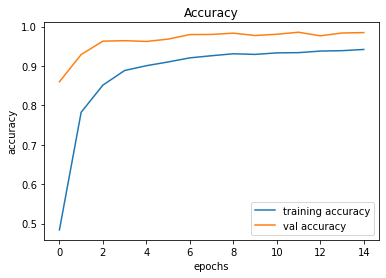

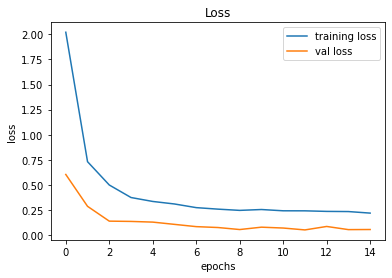

In [10]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#The model built is learning and working fine given that the accuracy and the validation accuracy increased
#significantly as they moved to the next epoch, and the loss and validation loss decreased.

In [11]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)


C:\Users\UFK96\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [12]:
#Accuracy with the test data
#Our dataset contains a test folder and in a test.csv file, we have the details related to the image path and their respective class labels.
#We extract the image path and labels using pandas. Then to predict the model, we have to resize our images to 30×30 pixels and make a numpy array containing all image data.
#From the sklearn.metrics, we imported the accuracy_score and observed how our model predicted the actual labels. We achieved a 95% accuracy in this model.

from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))





0.9418052256532067


In [13]:
model.save("traffic_classifier.h5")

In [14]:
#build a graphical user interface for our traffic signs classifier with Tkinter. 
#Creating a graphical user interface (GUI), which allows users to directly interact with their devices and complete certain tasks
#by manipulating elements like icons and scroll bars, is one way designers make their digital devices more efficient and usable.

import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

import numpy
#load the trained model to classify sign
#we have first loaded the trained model ‘traffic_classifier.h5’ using Keras. And then we build the GUI for uploading the image and a button is used to classify which calls the classify() function.
from keras.models import load_model
model = load_model('traffic_classifier.h5')

In [15]:
#dictionary to label all traffic signs class.
#The Images are classified into 43 classes from 0-42 in trained dataset.
#We are creating a dictionary where each image will have a corresponding number that determines classification
#For example, all images with id 1 represent "Speed limit 20km/h classification"
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',      
           3:'Speed limit (50km/h)',       
            4:'Speed limit (60km/h)',      
            5:'Speed limit (70km/h)',    
            6:'Speed limit (80km/h)',      
            7:'End of speed limit (80km/h)',     
            8:'Speed limit (100km/h)',    
            9:'Speed limit (120km/h)',     
           10:'No passing',   
           11:'No passing veh over 3.5 tons',     
           12:'Right-of-way at intersection',     
           13:'Priority road',    
           14:'Yield',     
           15:'Stop',       
           16:'No vehicles',       
           17:'Veh > 3.5 tons prohibited',       
           18:'No entry',       
           19:'General caution',     
           20:'Dangerous curve left',      
           21:'Dangerous curve right',   
           22:'Double curve',      
           23:'Bumpy road',     
           24:'Slippery road',       
           25:'Road narrows on the right',  
           26:'Road work',    
           27:'Traffic signals',      
           28:'Pedestrians',     
           29:'Children crossing',     
           30:'Bicycles crossing',       
           31:'Beware of ice/snow',
           32:'Wild animals crossing',      
           33:'End speed + passing limits',      
           34:'Turn right ahead',     
           35:'Turn left ahead',       
           36:'Ahead only',      
           37:'Go straight or right',      
           38:'Go straight or left',      
           39:'Keep right',     
           40:'Keep left',      
           41:'Roundabout mandatory',     
           42:'End of no passing',      
           43:'End no passing veh > 3.5 tons' }

In [ ]:
#initialize GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')

label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

#we build the GUI for uploading the image and a button is used to classify which calls the classify() function.
#The classify() function is converting the image into the dimension of shape (1, 30, 30, 3). 
#This is because to predict the traffic sign we have to provide the same dimension we have used when building the model.
#we predict the class, the model.predict_classes(image) returns us a number between (0-42) which represents the class it belongs to. 
#We use the dictionary to get the information about the class.
#Then we define the upload image function which allows the GUI to upload the images, and use the classify button to classify.
#Finally, we use the mainloop() function which tells Python to run the Tkinter event loop. 
#This method listens for events, such as button clicks or keypresses, and blocks any code that comes after it from running until the window it's called on is closed.
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    print(image.shape)
    pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
   

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()


(1, 30, 30, 3)


C:\Users\UFK96\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


General caution
(1, 30, 30, 3)
Priority road
(1, 30, 30, 3)
Road work
(1, 30, 30, 3)
Yield
(1, 30, 30, 3)
Stop
